# __`09 Support Vector Machine Algorithm`__ 

## Support vector Machines

Support Vector Machines (SVM) is a `supervised machine learning algorithm` which can be used for both classification or regression challenges. 

However,  it is mostly used in classification problems. 

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

Types of SVM kernels:

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,   classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [3]:
# import the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# check for null values
print(df.info())
print("-------------------------------------------- ")

print(df['species'].value_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
-------------------------------------------- 
<bound method IndexOpsMixin.value_counts of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>


In [13]:
# Let make X and y in our dataset
X = df.drop('species' , axis=1)
y = df['species']

In [14]:
# Train Test Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Call The Model 
model = SVC()

# Fit the model 
model.fit(X_train,y_train)



SVC()

In [17]:
# Predict the y_test
y_pred = model.predict(X_test)

In [20]:
# Evualte the model
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='micro'))
print(recall_score(y_test,y_pred,average='micro'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


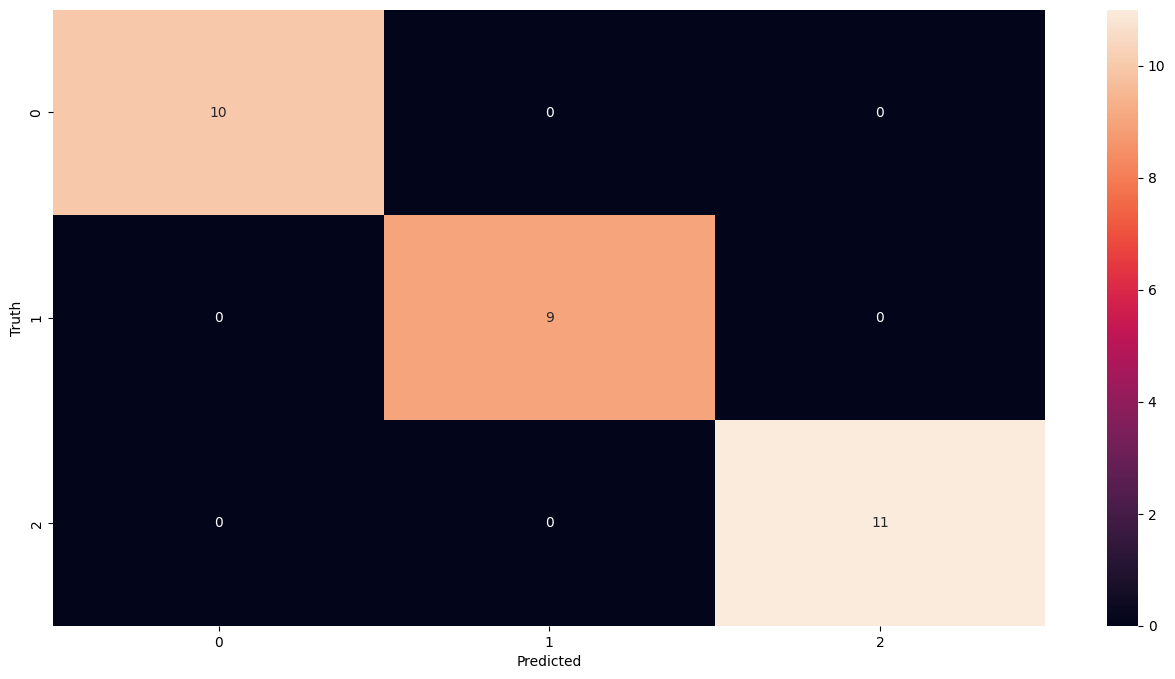

In [21]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# __`Saved The Model`__

In [22]:
import pickle
# saved te model
pickle.dump(model, open('E:\\Data_Sacience\\101-ML_Course\\Saved_Model_ML\\03_SVC_Model', 'wb'))
